# Baby Babel

Baby Babel is Babel library constructed from a small alphabet. 

## Method 1: Basic Python

In [0]:
import re

### Define the Symbol Set

In [0]:
letters = ['a', 'b', 't', '_']

### Generate all possible messages of length 6

In [0]:
books = []
for L1 in letters:
    for L2 in letters:
        for L3 in letters:
            for L4 in letters:
                for L5 in letters:
                    for L6 in letters:
                        books.append(''.join((L1,L2,L3,L4,L5,L6)))

### See how many messages

In [7]:
n = len(books)
n

4096

In [8]:
len(letters) ** 6

4096

In [9]:
books[:10]

['aaaaaa',
 'aaaaab',
 'aaaaat',
 'aaaaa_',
 'aaaaba',
 'aaaabb',
 'aaaabt',
 'aaaab_',
 'aaaata',
 'aaaatb']

### Find the string `at_bat`

In [10]:
result = [i for i, book in enumerate(books) if re.search(r'at_bat', book)][0]
result

722

In [11]:
books[result]

'at_bat'

## Method 2: Pandas

In [0]:
import pandas as pd

### Generate permutation space as MultiIndex

In [0]:
X = [letters for i in range(6)]

In [0]:
X

[['a', 'b', 't', '_'],
 ['a', 'b', 't', '_'],
 ['a', 'b', 't', '_'],
 ['a', 'b', 't', '_'],
 ['a', 'b', 't', '_'],
 ['a', 'b', 't', '_']]

In [0]:
library = pd.DataFrame(index=pd.MultiIndex.from_product(X)).reset_index()

In [15]:
library.head()

level_0 level_1 level_2 level_3 level_4 level_5
0       a       a       a       a       a       a
1       a       a       a       a       a       b
2       a       a       a       a       a       t
3       a       a       a       a       a       _
4       a       a       a       a       b       a

In [0]:
library['book'] = library.apply(lambda x: x.str.cat(), 1)

In [0]:
library.book.head(10)

0    aaaaaa
1    aaaaab
2    aaaaat
3    aaaaa_
4    aaaaba
5    aaaabb
6    aaaabt
7    aaaab_
8    aaaata
9    aaaatb
Name: book, dtype: object

### Find string `at_bat`

In [17]:
library[library.book.str.match(r'^at_bat$')].index.values[0]

722

### Generate texts from message set

In [0]:
text = ' '.join(library.book.sample(100).values)

In [0]:
text = text.replace('_', ' ')
text = re.sub(r'\s+', ' ', text)

In [20]:
text

'atbtba b ttt btttba aabt a bata tba b aaaba a ata abt tb b ta tt tb tattt tatttt atbtt t at a aaaaaa btbt taatta bataa t baaa ba bt aab babtb a t a abbt t ba tat tattat ab ta tbtbb bba ta abbttt at btbbtb btatt aaaat tbaabb atbttt b t b aataaa bbt a bb a a abab b babb a bb atb aa bta bt tbb b bbb b bb atbtta b b a tta ta a bta b ttb ba batt b bt aat ba bt t aabt atbtt b tb aa a btbbbt aba batt a tab a abta b bta tttaa abbb atabt tb tabtb bt bb t ab b t tttt tatt a btt t ab a t aa taba b t t ab aa aa a a abb t ab bab tt a t atabab aataba ta tba b b t tt att b ab tt taa tb b a b at bt bb bttaat b t t b ba a'

In [0]:
B = pd.Series(letters)

### Generate texts from alphabet sampling

In [22]:
B.sample(5, replace=True).str.cat()

't__b_'

# Create Big Babel

In [0]:
alpha = pd.Series('_ , . a b c d e f g h i j k l m n o p q r s t u v w x y z'.split())
alpha[alpha == '_'] = ' '

def get_message(m_len = 10, weights=[]):
    if len(weights) == 0:
        p = 1/alpha.shape[0]
        weights = [p for i in range(alpha.shape[0])]
    msg = alpha.sample(m_len, replace=True, weights=weights).str.cat()
    return msg

def print_page(n_pages = 1, weights=[]):
    for i in range(n_pages):
        for i in range(40):
            print(get_message(80, weights))
        print()
        print('-'*80)
        print()

In [0]:
print_page(5)

# Add a Language Models from Moby Dick

## Parse text into characters

In [0]:
text = open('2701-0.txt', 'r', encoding='utf-8').read().lower().strip()
text = re.sub(r'\n', ' ', text)
text = re.sub(r'\s+', ' ', text)
ltr_pat = ''.join(alpha.values.tolist())
regex = r'[^{}]+'.format(ltr_pat)
text = re.sub(regex, '', text)
textdf = pd.DataFrame(list(text), columns=['ltr'])

## Create Unigram model

In [0]:
LM = textdf.ltr.value_counts().to_frame().rename(columns={'ltr':'n'})
LM = LM.sort_index()

In [0]:
LM.head()

n
   215829
,   19387
.    8188
a   79234
b   17211

In [0]:
LM['p'] = LM.n / LM.n.sum()

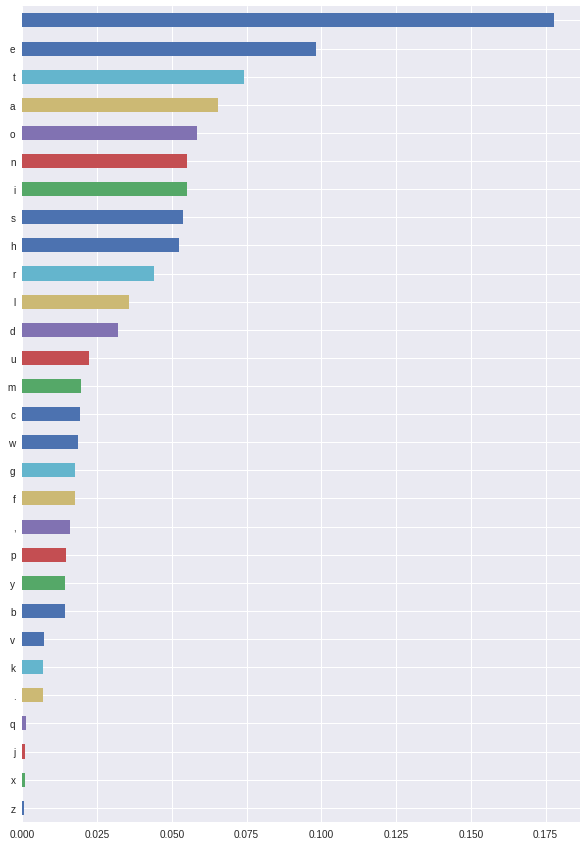

In [30]:
%matplotlib inline
LM.p.sort_values().plot(kind='barh', figsize=(10,15))

### Generate text

In [0]:
weights = LM.p.values.tolist()

In [32]:
print_page(1, weights)

 o enrbsa  se a   htnerib w  isyoh,tnn gtheirdhg l  r eie t rbelnsoes srurcwar s
   etrtstueteienhne  enermagcpstsetinidh aoest h  k ehermhaew f yeliede  yaado n
toeh hhy  a  snlyayav  yhturaet ussa a wbsos uwylhilnabfc tee musph  elioiaol  t
yroh ai  hsulihehb hrmeuhthtdeo  w lelipw dtiahn  hayhbac hnipt ian i nuot,n tie
 ium teeh tessc gn eewio gsontrou eceiel  k ohueana eefeiegrwr  hwt po d gde,anl
addapw eooea i cadt sdsorse etaarpia sabgegh hprolmltskdnhsnwhtcoiehuoenm yl pkb
gusconr  tneet bmosee erioi lwle ns tn t i  ordpeti i lsilswttfaet mee  lrlilsht
haebnhk  ysyetlyeblttyodmmtftm ,di dpstarul ceuootielvo   loovic y tuyaa e ot hy
erd rmsi oaeueanse hgac k n siixmhnhwnoa ihnsl ohrrjcn volie teotilmethanahaewie
 eiee heehhtr psu ghpnt ei hn  ae aiipbh dw  aeuieltstti harg  rrlusca roenanypw
ssleheethnwt  yhrc fu com  dactumgin e sefho e ls krpe orralancvmah gsi  feogh s
eu   aqet,dtotsdnlouieosobogiwe o,nhhcnahp  ner otwnlias,ru  ypou eokhhhrstna we
sft s aayhehon f gnthersepl 

## Create Bigram Model

In [0]:
text1 = text2 = textdf.reset_index().rename(columns={'index':'offset'})
text2.offset = text1.offset + 1
bigrams = text2.join(text1, on='offset', lsuffix='_x', rsuffix='_y')[['ltr_x', 'ltr_y']]

In [0]:
bigrams.head(10)

ltr_x ltr_y
0           t
1     t     h
2     h     e
3     e      
4           p
5     p     r
6     r     o
7     o     j
8     j     e
9     e     c

In [0]:
bigram_model = bigrams.groupby(['ltr_x', 'ltr_y']).ltr_x.count().to_frame().rename(columns={'ltr_x':'n'})

In [0]:
# bigram_model = bigram_model.unstack().fillna(0)

In [0]:
bigram_model.loc['q']

n
ltr_y      
,         1
u      1580

In [0]:
bigram_model.loc[' '].n.sort_values(ascending=False)

ltr_y
t    35650
a    23991
s    18166
w    14748
i    14692
o    14402
h    13569
b    11057
c     8594
m     8397
f     8357
p     6233
l     5934
d     5867
n     4831
e     4009
r     3903
g     3594
u     2717
y     2523
v     1592
k      944
j      835
q      713
.      341
        86
,       46
z       33
x        5
Name: n, dtype: int64

In [0]:
bigram_model.loc[' '].n.sort_values().idxmax()

't'

In [0]:
bigram_model['p'] = bigram_model.groupby('ltr_x').apply(lambda x: x / x.sum())

In [0]:
bigram_model.loc['q']

n         p
ltr_y                
,         1  0.000633
u      1580  0.999367

In [0]:
BGM = bigram_model.p.unstack().fillna(0.00001)
BGM.index.name = 'if'
BGM.columns.name = 'then'

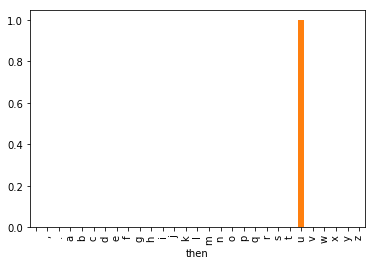

In [0]:
BGM.loc['q'].plot(kind='bar')

In [0]:
BGM

then                   ,         .         a         b         c         d  \
if                                                                           
      0.000398  0.000213  0.001580  0.111157  0.051230  0.039819  0.027184   
,     0.994481  0.000258  0.000052  0.000980  0.000361  0.000155  0.000103   
.     0.974960  0.001344  0.005741  0.001221  0.000611  0.000244  0.001710   
a     0.065830  0.002764  0.001451  0.000088  0.025519  0.031577  0.040349   
b     0.029748  0.013364  0.003835  0.056243  0.024810  0.000232  0.000523   
c     0.016511  0.002273  0.001115  0.138091  0.000010  0.015610  0.000043   
d     0.532520  0.047693  0.016833  0.030911  0.001055  0.000618  0.011170   
e     0.315495  0.026138  0.011280  0.054965  0.002380  0.018378  0.078614   
f     0.370320  0.009501  0.004704  0.057150  0.000659  0.000564  0.000141   
g     0.356119  0.035847  0.013014  0.055438  0.000658  0.000188  0.000423   
h     0.086710  0.010633  0.003419  0.185434  0.000659  0.000141  0.000376   
i     0.028635  0.001499  0.001004  0.015532  0.008591  0.043103  0.034212   
j     0.000010  0.000850  0.002551  0.189626  0.000010  0.000010  0.000010   
k     0.224614  0.062143  0.027119  0.006081  0.002067  0.000365  0.000010   
l     0.127744  0.014573  0.005327  0.085455  0.001776  0.001314  0.055917   
m     0.140319  0.023970  0.012196  0.172730  0.020046  0.000169  0.000127   
n     0.218572  0.023675  0.010422  0.025068  0.002516  0.035775  0.166954   
o     0.114649  0.007120  0.001625  0.018435  0.008292  0.010764  0.021034   
p     0.079000  0.015263  0.006038  0.105557  0.000839  0.000168  0.000503   
q     0.000010  0.000633  0.000010  0.000010  0.000010  0.000010  0.000010   
r     0.183447  0.021051  0.010264  0.066269  0.008827  0.011664  0.034450   
s     0.346443  0.051669  0.019265  0.034170  0.000583  0.013232  0.000353   
t     0.222304  0.021614  0.009511  0.040113  0.000334  0.004750  0.000122   
u     0.042201  0.002867  0.000625  0.019189  0.028784  0.051869  0.021395   
v     0.000010  0.000010  0.001375  0.087171  0.000010  0.000010  0.000010   
w     0.089042  0.018412  0.006744  0.175421  0.000621  0.000399  0.002928   
x     0.076128  0.010338  0.009398  0.085526  0.001880  0.156015  0.000010   
y     0.619501  0.063494  0.023970  0.017528  0.002380  0.000813  0.001509   
z     0.010972  0.003135  0.001567  0.081505  0.007837  0.000010  0.001567   

then         e         f         g    ...            q         r         s  \
if                                    ...                                    
      0.018575  0.038720  0.016652    ...     0.003304  0.018084  0.084168   
,     0.000052  0.000206  0.000103    ...     0.000052  0.000155  0.000206   
.     0.003420  0.001344  0.000611    ...     0.000010  0.000122  0.000733   
a     0.000454  0.008103  0.019588    ...     0.000050  0.101005  0.089848   
b     0.244727  0.000010  0.000058    ...     0.000010  0.055546  0.024635   
c     0.150270  0.000010  0.000010    ...     0.000686  0.057809  0.001758   
d     0.130466  0.002548  0.003397    ...     0.000026  0.020256  0.034463   
e     0.039814  0.008028  0.008363    ...     0.005036  0.128937  0.073695   
f     0.066933  0.038711  0.000047    ...     0.000010  0.076152  0.002681   
g     0.107400  0.000846  0.014470    ...     0.000094  0.058445  0.032088   
h     0.421319  0.000502  0.000094    ...     0.000094  0.012907  0.002650   
i     0.030509  0.020090  0.033853    ...     0.000480  0.038365  0.130073   
j     0.282313  0.000010  0.000010    ...     0.000010  0.000010  0.000010   
k     0.339049  0.002554  0.000730    ...     0.000122  0.001824  0.088289   
l     0.197081  0.014757  0.000692    ...     0.000023  0.001153  0.021283   
m     0.247637  0.001899  0.000169    ...     0.000042  0.004051  0.030005   
n     0.081073  0.004133  0.151095    ...     0.000988  0.001198  0.041570   
o     0.005156  0.105580  0.004958    ...     0.000198  0.116711  0.030668   
p     0.197585  0.000

In [0]:
BGM.loc['q'].idxmax()

'u'

### Get entropy of characters as antecendents

In [0]:
import numpy as np

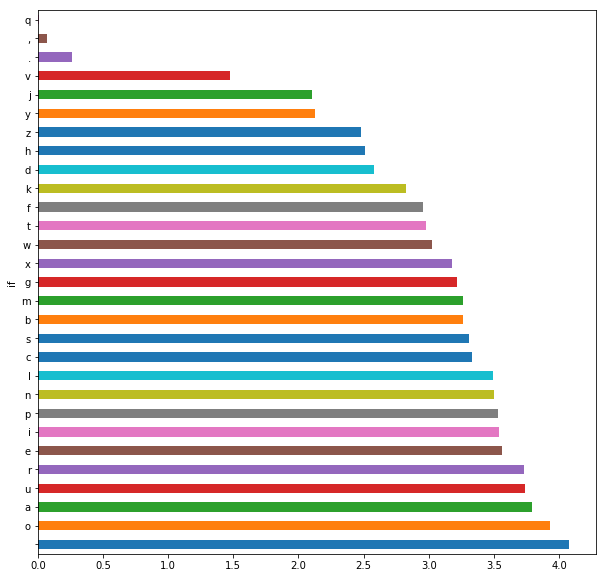

In [0]:
BGM.apply(lambda x: -sum(x * np.log2(x)), 1).sort_values(ascending=False).plot(kind='barh', figsize=(10,10))

### Define function to sample a single letter

In [0]:
def get_letter(weights=[]):
    if len(weights) == 0:
        p = 1/alpha.shape[0]
        weights = [p for i in range(alpha.shape[0])]
    msg = alpha.sample(1, replace=True, weights=weights).values[0]
    return msg

In [0]:
# Test
get_letter(weights=BGM.loc['q'].values)

'u'

### Generate text

In [0]:
def print_page2(n_pages=1):
    n = 80 * 40 * n_pages
    ltrs = []
    ltrs.append(get_letter())
    for i in range(n):
        ltrs.append(get_letter(weights=BGM.loc[ltrs[-1]].values))
    txt = ''.join(ltrs)
    lines = 0
    for i in range(0, len(txt), 80):
        print(txt[i:i + 80])
        if i % 80 == 0:
            lines += 1
        if i > 0 and lines % 40 == 1:
            print()
            print('-' * 80)
            print()

In [0]:
print_page2(2)

zirdranedel. finthec w, l s ang. beseass alesourn e deherg of the sth s tincat b
eroee, st, t g vine ry cks blas ans h cir tr sthes merat rd as icarelld. f bepom
e, tle. d thd thin otidekny wanlurthon hig be, heath cournantt the s hesug boula
st souchessumame is spe wheno w, pac g whrthelencorany s f umys un urent tharrof
omy te miks nd whistuinta te san twhereromeme ipis. plyam ong vequsherky wlly oy
. ouor melet isiste hiof ungel he iestarpores ugri. smed as asite wend theringre
 squlrofowh oldug st mmasealingane ve rinio mat, indedowhe a the ayisowito mem t
remenyed e gughblarmat, bst. be aler f oswhaw aghengro med in cily dy f abe ign,
 ans. o istho wad fan. wdo ont wemm sas. o tee wereliturinomantorarthes, sedipri
turtioulf wa osste ofulin, athe schtuthing ag ineang tee wis, cinaburome anechex
toro y loce gen cesedie med melftonthe pouertlinenotancathie theronougr oned ide
an le ctkeche nd rona ijus aled touomand owano the ksuti bly tururve, co ile oso
ugtherglendixp pf amistas rs